In [16]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [81]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import seaborn as sns
import pickle

In [28]:
my_data = pd.read_csv('Weather_data.csv')
my_data

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindDir,WindSpeed,WindDir8am,WindDir4pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,02-01-2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,02-02-2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,02-03-2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,02-04-2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,02-05-2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No


Data Pre processing

In [29]:
# Convert categorical variables into dummy/indicator variables
df_sydney = pd.get_dummies(data=my_data, columns=['RainToday', 'WindDir', 'WindDir8am', 'WindDir4pm'])


In [30]:
df_sydney.replace(['No', 'Yes'], [0,1], inplace=True)

Training and test data

Now we set our 'Features' or x values and our y values

In [31]:
df_sydney.drop('Date',axis=1,inplace=True)

In [32]:
df_sydney = df_sydney.astype(float)

In [33]:
features = df_sydney.drop(columns='RainTomorrow', axis=1)
Y = df_sydney['RainTomorrow']

Heatmap

<Axes: >

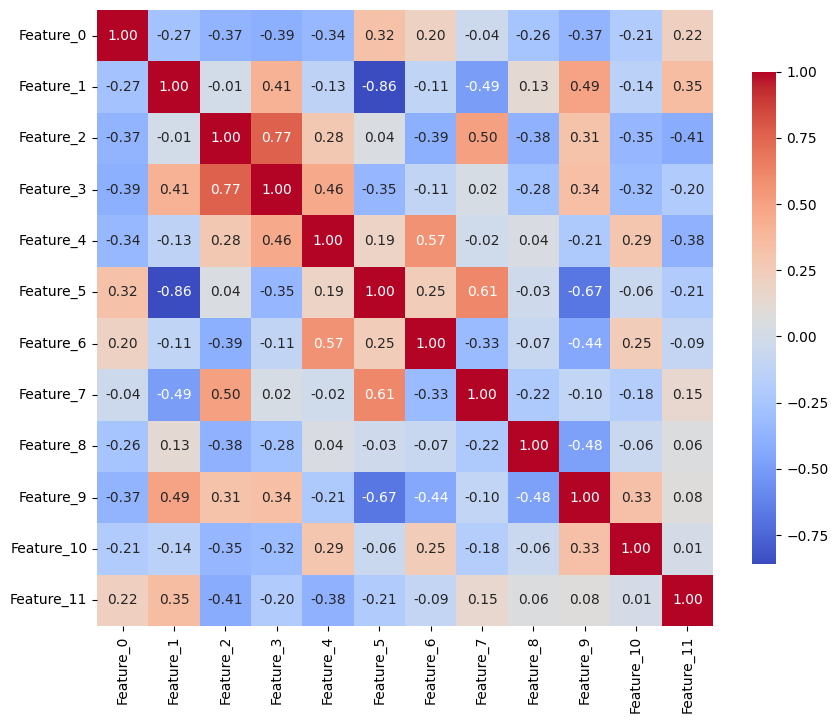

In [79]:
np.random.seed(42)
my_data = pd.DataFrame(np.random.rand(10, 12), columns=[f'Feature_{i}' for i in range(12)])

# Calculate the correlation matrix
correlation_matrix = my_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})


Linear Regression

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size=0.2,random_state=8)

In [37]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [38]:
predictions = model.predict(x_test)
predictions

array([-4.95529609e-02,  3.92159240e-02, -8.85894399e-02,  2.57827572e-01,
        3.55171368e-01,  5.62745012e-01,  6.58576751e-02,  1.54040621e-01,
        7.13521121e-01,  3.41292256e-01,  5.94244721e-01,  3.58464712e-01,
        8.13331667e-02,  1.92965105e-01,  2.18265542e-01,  7.58159453e-01,
        7.69846107e-01,  5.31672224e-01,  1.53452101e-01,  1.69083500e-01,
        3.12584615e-01,  5.65580697e-01,  3.53860234e-02,  1.27025262e-01,
       -4.90763857e-02,  1.52360638e-01,  2.49151327e-01,  8.71210397e-01,
        1.68591927e-02,  6.79986039e-01, -3.44734703e-02,  1.40634841e-01,
        9.16597566e-01, -7.59922779e-02, -3.92799294e-02,  2.32346971e-01,
        3.10722613e-01,  1.94897448e-02, -3.23952131e-03,  4.13573186e-01,
       -1.41760786e-02,  6.00835086e-01,  4.21586481e-01, -4.16124390e-03,
       -1.09981029e-01,  6.23683948e-01,  9.49729764e-02,  1.90543770e-02,
        7.03488428e-02,  1.66903741e-01,  1.28030204e-01,  5.41186750e-01,
        1.80417610e-01,  

Using prediction and the Y_test dataframe calculate  the value

In [40]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test, predictions)
LinearRegression_RMSE = np.sqrt(LinearRegression_MSE)
LinearRegression_R2 = metrics.r2_score(y_test, predictions)

#print the metrices

print(f'MAE: {LinearRegression_MAE}')
print(f'MSE: {LinearRegression_MSE}')
print(f'RMSE: {LinearRegression_RMSE}')
print(f'R²: {LinearRegression_R2}')

MAE: 0.2733300290879226
MSE: 0.12517817591244368
RMSE: 0.3538052796559764
R²: 0.3674820752262956


In [41]:
Report2 = pd.DataFrame({"MAE":LinearRegression_MAE,"MSE":LinearRegression_MSE,"RMSE":LinearRegression_RMSE,"R2":LinearRegression_MSE},index=[1])
Report2

,MAE,MSE,RMSE,R2
1,0.27333,0.125178,0.353805,0.125178


Using KNN

In [48]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [50]:
predictions = KNN.predict(x_test)

In [55]:
KNN_MAE = metrics.mean_absolute_error(y_test, predictions)
KNN_MSE = metrics.mean_squared_error(y_test, predictions)
KNN_RMSE = np.sqrt(KNN_MSE)
KNN_R2 = metrics.r2_score(y_test, predictions)

Report1 = pd.DataFrame({"MAE":KNN_MAE,"MSE":KNN_MSE,"RMSE":KNN_RMSE,"R2":KNN_R2},index=[1])
Report1

,MAE,MSE,RMSE,R2
1,0.242137,0.148092,0.384827,0.251702


Desicion Tree

In [62]:
model= DecisionTreeClassifier()
Decision = model.fit(x_train,y_train)

In [63]:
predictions = model.predict(x_test)

In [64]:
Decision_Accuracy_Score = metrics.accuracy_score(y_test,predictions)
Decision_JaccardIndex = metrics.jaccard_score(y_test,predictions)
Decision_F1_Score = metrics.f1_score(y_test,predictions)
Report2 = pd.DataFrame({"Accuracy_Score":Decision_Accuracy_Score,"JaccardIndex":Decision_JaccardIndex,"F1_Score":Decision_F1_Score},index=[1])
Report2


,Accuracy_Score,JaccardIndex,F1_Score
1,0.741985,0.367041,0.536986


In [83]:
df = pd.DataFrame(my_data)
df.to_pickle('output.pkl')